<a href="https://colab.research.google.com/github/dakshlkobuddy/MNIST-Digit-Classification/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  # it is computer vision library
from google.colab.patches import cv2_imshow #used to show the images
from PIL import Image #image processing(pillow library to resize the images)
import tensorflow as tf
tf.random.set_seed(3)
# tensorflow:- google
# pytorch:- facebook
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
# Load the MNIST dataset
# (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# # Normalize the images (optional)
# X_train = (X_train * 255).astype(np.uint8)  # Convert pixel values to 0-255 range

# # Dictionary to track if an image has been saved for each digit (0-9)
# saved_digits = {}

# # Loop through the training data to find one image per digit (0-9)
# for i in range(len(X_train)):
#     digit = Y_train[i]
#     if digit not in saved_digits:
#         # Save the image as PNG
#         img = Image.fromarray(X_train[i])
#         img.save(f'mnist_digit_{digit}.png')

#         # Mark this digit as saved
#         saved_digits[digit] = True

#         # Stop when we have saved all digits from 0 to 9
#         if len(saved_digits) == 10:
#             break

# print("MNIST images for digits 0 to 9 saved as PNG files.")


Loading the MNIST data from keras.datasets

In [ ]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
# shape of the numpy arrays(60000 images, 28 width, 28 height)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training Data = 60000 Images
Test Data = 10000 Images

Image Dimensions-----> 28x28
Greyscale Image------> 1Channel

In [ ]:
# printing the 10th Image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


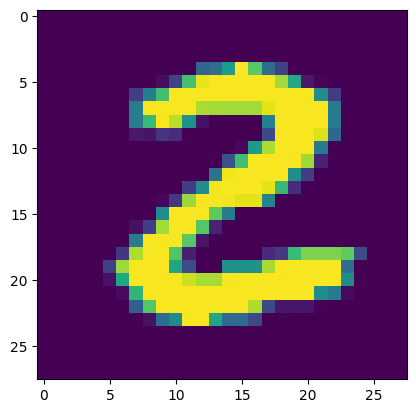

2


In [ ]:
# converting numpy array to image
plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

Image Labels

In [ ]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [ ]:
# Unique Values in Y_train
print(np.unique(Y_train))

# Unique Values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimension in this dataset, If not then we have to resize the images with the common dimensions

In [ ]:
# scaling the values
# we are doing normalization means the values which are in the range between 0 to 255
# we are converting in between 0 to 1
# so that it becomes easier for neural network to understand images
X_train = X_train/255
X_test = X_test/255

In [ ]:
# printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [ ]:
# Setting up the layers of the neural network
# Dense(50 neurons)
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid'), # 10 is the no of classes(0,1,2,3,4,5,6,7,8,9)

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#  Compiling the neural network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training the Neural Network

In [ ]:
#  epochs means that how many times your neural network can go through the data
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8467 - loss: 0.5268
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9569 - loss: 0.1457
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9685 - loss: 0.1035
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9757 - loss: 0.0798
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9815 - loss: 0.0642
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9843 - loss: 0.0529
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9870 - loss: 0.0436
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9891 - loss: 0.0386
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9894 - loss: 0.0341
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9894 - loss: 0.0320


Training Data Accuracy = 98.9%

Accuracy on the Test Data:

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9655 - loss: 0.1418


Test Data Accuracy = 96.3%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


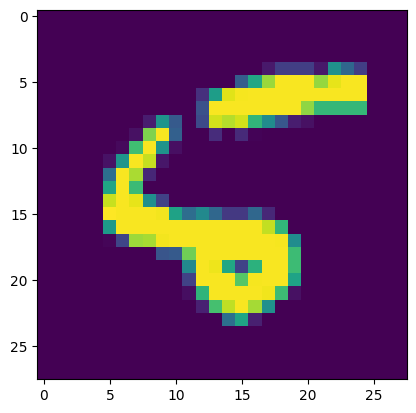

In [ ]:
# first data point in x_test
plt.imshow(X_test[8])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)
#  predict gives that what is the probability that the label is 0 or 1

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[1.17726859e-06 2.10117141e-04 1.10213995e-01 9.94365215e-01
 4.27444866e-06 4.39042412e-03 1.50574067e-11 9.99999046e-01
 5.34885824e-01 9.94310498e-01]


model.predict() gives the prediction probability of each class(0-9) for that particular data point

In [ ]:
#  converting the prediction probabilities to class label
# argmax will tell you the maximum value of the probability corresponding to the lbel

label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [ ]:
# converting the prediction probability to the classs label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 8, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
# print(Y_pred)

Y_test -----> True Labels

Y_pred_labels ------> Predicted by my Neural Network

Building the Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 946    0    2    2    0    1    7    1    4   17]
 [   0 1118    0    7    0    0    3    1    5    1]
 [   3    1  992    6    3    2    4    5   14    2]
 [   0    0    6  985    0    8    0    2    4    5]
 [   0    1    6    0  947    0    2    1    0   25]
 [   1    0    0   20    2  855    4    1    6    3]
 [   2    2    1    0    2    9  938    0    4    0]
 [   1    3    7    2    5    0    0  979    1   30]
 [   0    0    3    9    3    5    2    3  942    7]
 [   0    1    1    5    4    3    1    1    4  989]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

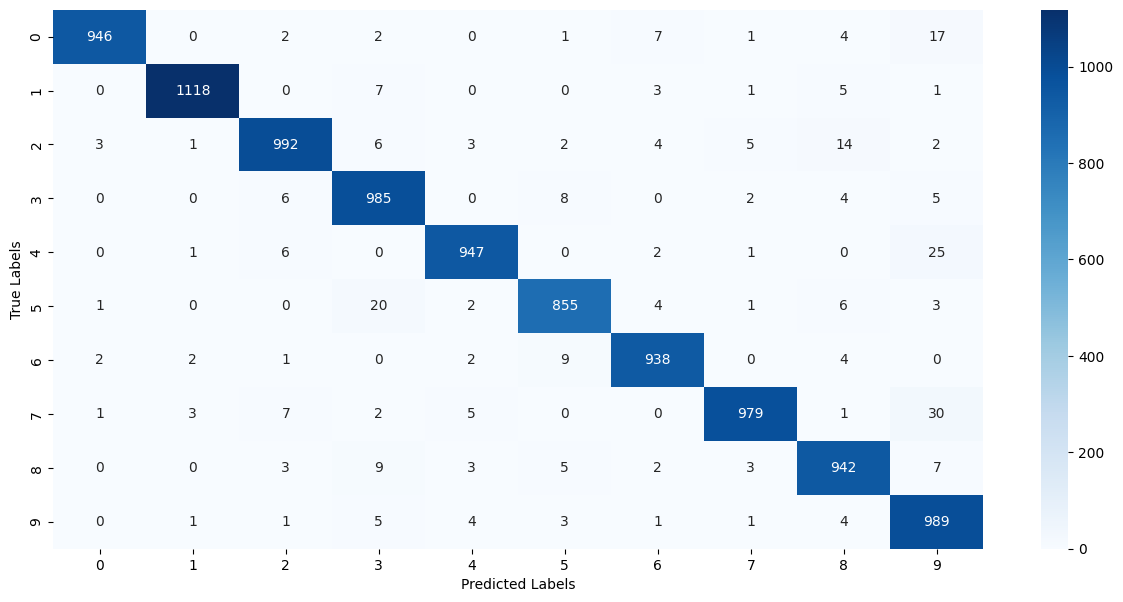

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In this Hetamap

952 means ------> 952 Images of '0' has been correctly predicted to '0'

Diagonal represents the correct predictions

Others represent the False Predictions

Building the Predictive System bold text

In [ ]:
input_image_path = '/content/mnist_digit_3.png'

input_image = cv2.imread(input_image_path)

In [ ]:
print(type(input_image))

<class 'numpy.ndarray'>


In [ ]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(28, 28, 3)

In [ ]:
greyscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
greyscale.shape

(28, 28)

In [ ]:
input_image_resize = cv2.resize(greyscale, (28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
input_image_resize = input_image_resize/255

In [ ]:
type(input_image_resize)

numpy.ndarray

In [ ]:
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

In [ ]:
 input_prediction = model.predict(image_reshaped)
 print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[6.08101441e-03 7.24776601e-03 9.11429584e-01 9.96401906e-01
  5.42681722e-04 1.36073768e-01 2.27769142e-05 5.73915720e-01
  9.48315620e-01 1.15838595e-01]]


In [ ]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


**Predictive** **System**

In [ ]:
input_image_path = input('Path of the image to be detected')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print("The Handwritten Digit is Recognized as : ", input_pred_label)

Path of the image to be detected/content/mnist_digit_6.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The Handwritten Digit is Recognized as :  6
